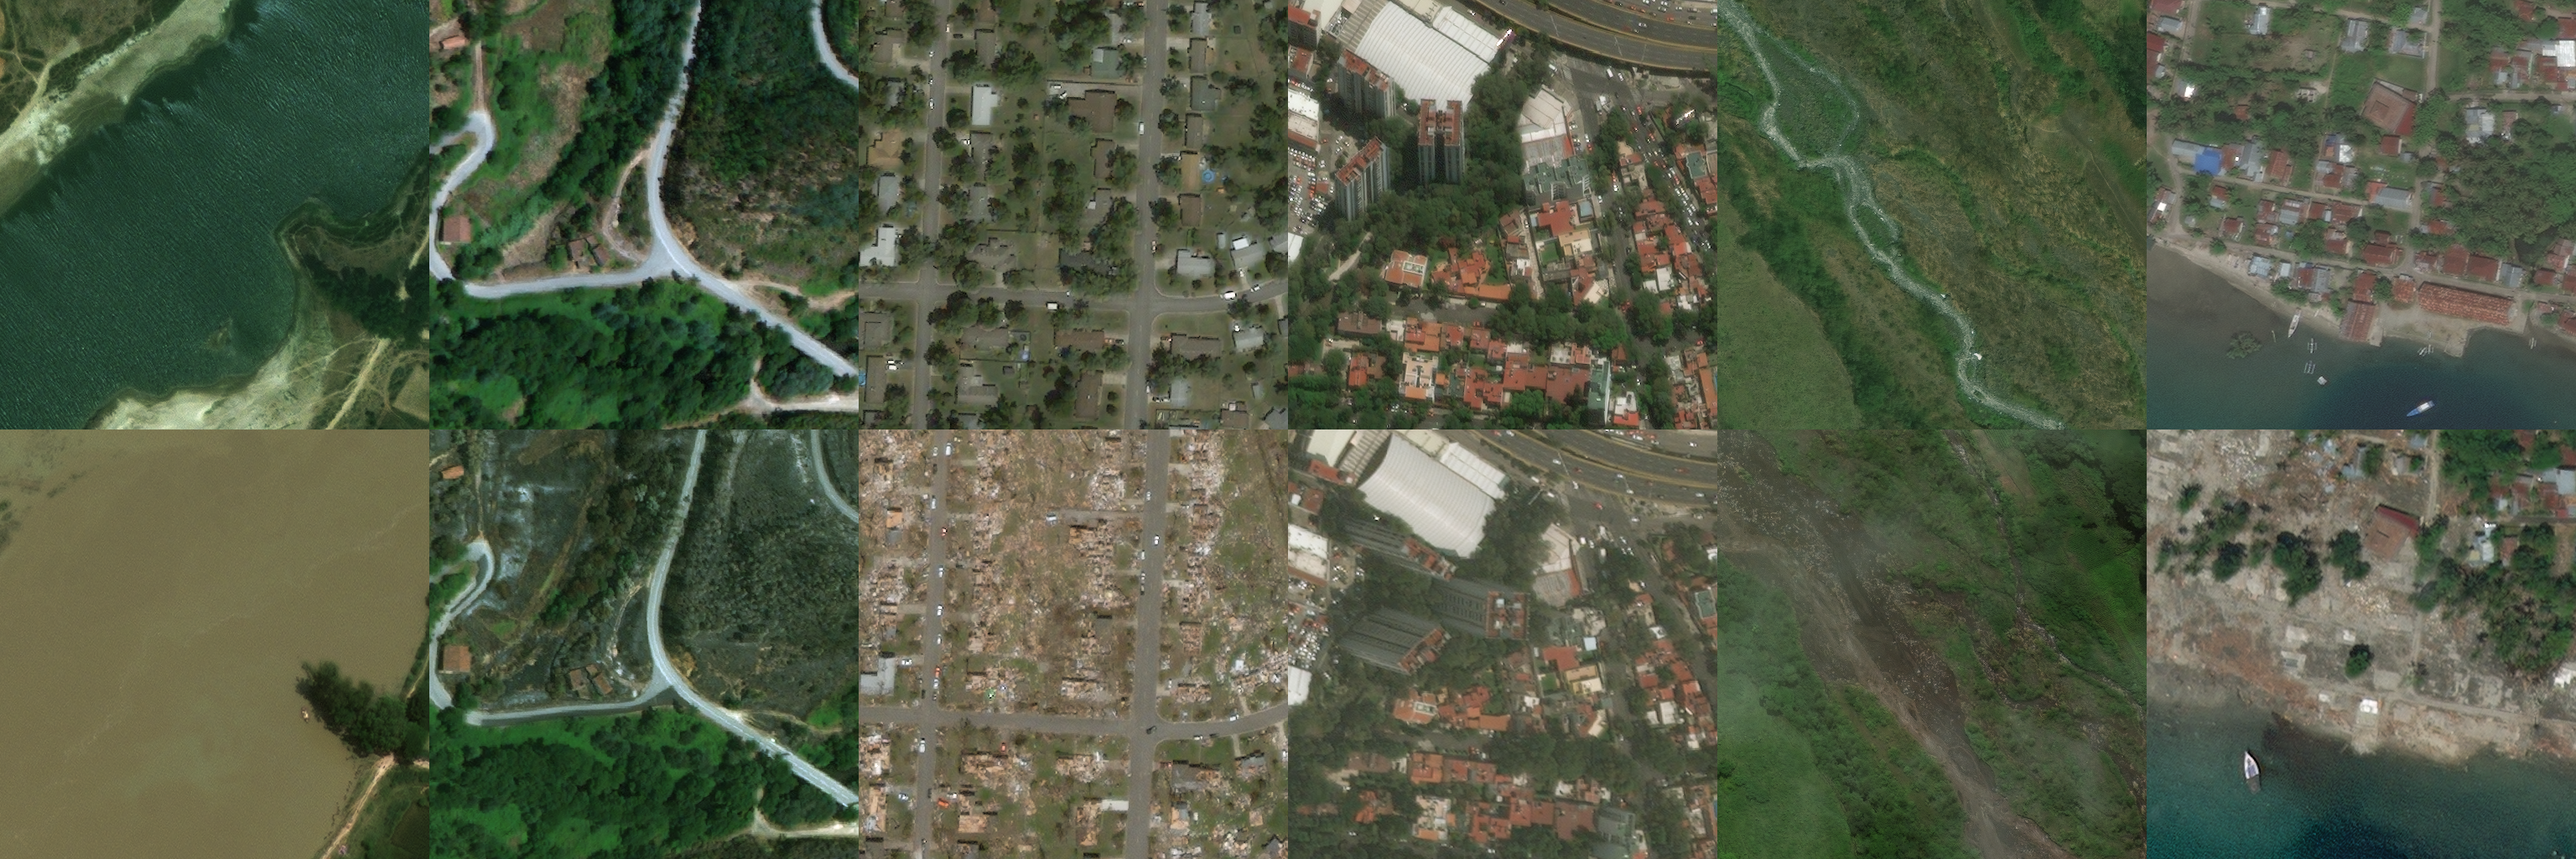

In [38]:
# 512px golden sample
from diffusers.utils import make_image_grid
import random
from PIL import Image
import matplotlib.pyplot as plt

# List of disaster types
random_id = f"{random.randint(1, 15):08d}"
random_id = "00000009"
disaster_list = ["flooding", "wildfire", "storm", "earthquake", "volcano", "tsunami"]
golden_sample_pre_image_paths = {
    "flooding": "../data/xbd/images-w512-h512/nepal-flooding/images/nepal-flooding_00000102_pre_disaster_part1.png",
    "wildfire": "../data/xbd/images-w512-h512/portugal-wildfire/images/portugal-wildfire_00000282_pre_disaster_part2.png",
    "storm": "../data/xbd/images-w512-h512/joplin-tornado/images/joplin-tornado_00000001_pre_disaster_part1.png",
    "earthquake": "../data/xbd/images-w512-h512/mexico-earthquake/images/mexico-earthquake_00000045_pre_disaster_part3.png",
    "volcano": f"../data/xbd/images-w512-h512/guatemala-volcano/images/guatemala-volcano_{random_id}_pre_disaster_part1.png",
    "tsunami": "../data/xbd/images-w512-h512/palu-tsunami/images/palu-tsunami_00000015_pre_disaster_part2.png",
}
golden_sample_post_image_paths = {
    "flooding": "../data/xbd/images-w512-h512/nepal-flooding/images/nepal-flooding_00000102_post_disaster_part1.png",
    "wildfire": "../data/xbd/images-w512-h512/portugal-wildfire/images/portugal-wildfire_00000282_post_disaster_part2.png",
    "storm": "../data/xbd/images-w512-h512/joplin-tornado/images/joplin-tornado_00000001_post_disaster_part1.png",
    "earthquake": "../data/xbd/images-w512-h512/mexico-earthquake/images/mexico-earthquake_00000045_post_disaster_part3.png",
    "volcano": f"../data/xbd/images-w512-h512/guatemala-volcano/images/guatemala-volcano_{random_id}_post_disaster_part1.png",
    "tsunami": "../data/xbd/images-w512-h512/palu-tsunami/images/palu-tsunami_00000015_post_disaster_part2.png",
}
golden_sample_images = []
for _, path in golden_sample_pre_image_paths.items():
    image = Image.open(path)
    golden_sample_images.append(image)
for _, path in golden_sample_post_image_paths.items():
    image = Image.open(path)
    golden_sample_images.append(image)

display(make_image_grid(golden_sample_images, rows=2, cols=6))

In [39]:
print(random_id)

00000009


In [2]:
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns


# Load the JSONL file
def load_jsonl(file_path):
    data = []
    with open(file_path, "r") as f:
        for line in f:
            data.append(json.loads(line))
    return data


# Extract change_caption fields
def extract_captions(data):
    return [item["change_caption"] for item in data]


# Preprocess captions to get word lengths and word frequencies
def preprocess_captions(captions):
    word_lengths = []
    word_frequencies = Counter()
    for caption in captions:
        words = caption.split()
        word_lengths.append(len(words))
        word_frequencies.update(words)
    return word_lengths, word_frequencies


# Plot (b): Distribution of the word length of referring sentences
def plot_word_length_distribution(word_lengths):
    plt.figure(figsize=(10, 6))
    sns.histplot(word_lengths, bins=20, kde=True)
    plt.title("Distribution of the word length of referring sentences")
    plt.xlabel("Word Length")
    plt.ylabel("Frequency")
    plt.show()


# Plot (d): Word cloud of the top 50 words in referring sentences
def plot_word_cloud(word_frequencies):
    wordcloud = WordCloud(
        width=800, height=400, background_color="white"
    ).generate_from_frequencies(word_frequencies)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word cloud of the top 50 words in referring sentences")
    plt.show()


file_path = "../data/xbd/xbd_gt.jsonl"  # Replace with your file path
data = load_jsonl(file_path)
captions = extract_captions(data)
word_lengths, word_frequencies = preprocess_captions(captions)

# Plot (b): Distribution of the word length of referring sentences
plot_word_length_distribution(word_lengths)

# Plot (d): Word cloud of the top 50 words in referring sentences
plot_word_cloud(word_frequencies)

ModuleNotFoundError: No module named 'seaborn'